In [1]:
import os
import pandas as pd
import numpy as np
import datetime

In [2]:
directory_path = 'air_quality_data'


csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]


stations = []

for file in csv_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    stations.append(df)

In [3]:
stations[0]

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Hengitettävät hiukkaset <10 µm [µg/m3]
0,Espoo Lintuvaara 2,2024,3,5,00:00,7.5
1,Espoo Lintuvaara 2,2024,3,5,01:00,6.4
2,Espoo Lintuvaara 2,2024,3,5,02:00,4.6
3,Espoo Lintuvaara 2,2024,3,5,03:00,4.1
4,Espoo Lintuvaara 2,2024,3,5,04:00,3.8
...,...,...,...,...,...,...
2251,Espoo Lintuvaara 2,2024,6,6,19:00,8.9
2252,Espoo Lintuvaara 2,2024,6,6,20:00,8.9
2253,Espoo Lintuvaara 2,2024,6,6,21:00,8.3
2254,Espoo Lintuvaara 2,2024,6,6,22:00,7.3


In [4]:
for station in stations:
    count_dashes = station['Hengitettävät hiukkaset <10 µm [µg/m3]'].str.count('-').sum()
    print(f"Tyhjät rivit {station['Havaintoasema'][0]} (rivejä {len(station)}): {count_dashes}")
    station["Date"] = station["Vuosi"].astype(str) + "-" + station["Kuukausi"].astype(str) + "-" +  station["Päivä"].astype(str) + " " + station["Aika [UTC]"]
    station["Date"] = pd.to_datetime(station["Date"])
    station = station.replace('-',np.NaN)
    station["Hengitettävät hiukkaset <10 µm [µg/m3]"] = station["Hengitettävät hiukkaset <10 µm [µg/m3]"].astype(float)

Tyhjät rivit Espoo Lintuvaara 2 (rivejä 2256): 1
Tyhjät rivit Helsinki Teollisuuskatu (rivejä 2256): 4
Tyhjät rivit Jyväskylä Hannikaisenkatu (rivejä 2255): 2
Tyhjät rivit Kuopio Savilahti KYS (rivejä 2254): 1
Tyhjät rivit Lahti Saimaankatu (rivejä 2256): 3
Tyhjät rivit Oulu keskusta 2 (rivejä 2247): 14
Tyhjät rivit Pori Paanakedonkatu (rivejä 2256): 4
Tyhjät rivit Tampere Pirkankatu (rivejä 2256): 1
Tyhjät rivit Turku Kauppatori 2 (rivejä 2256): 4
Tyhjät rivit Vantaa Hämeenlinnanväylä (rivejä 2256): 32


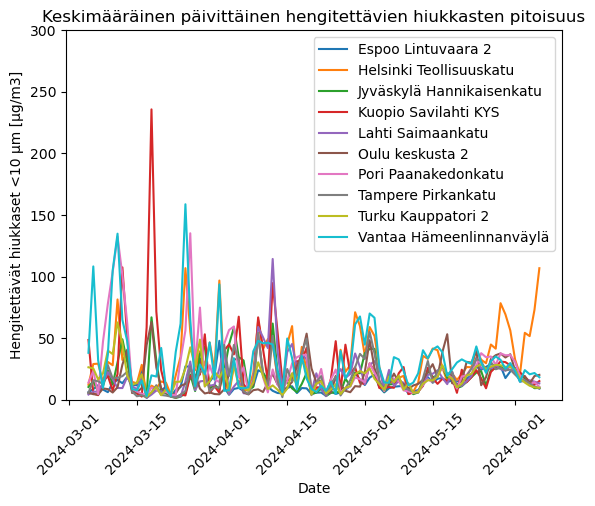

In [5]:
import matplotlib.pyplot as plt
for df in stations:
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert 'Hengitettävät hiukkaset <10 µm [µg/m3]' column to numeric
    df['Hengitettävät hiukkaset <10 µm [µg/m3]'] = pd.to_numeric(df['Hengitettävät hiukkaset <10 µm [µg/m3]'], errors='coerce')
    
    # Calculate daily average of 'Hengitettävät hiukkaset <10 µm [µg/m3]'
    daily_avg = df.groupby(df['Date'].dt.date)['Hengitettävät hiukkaset <10 µm [µg/m3]'].mean()
    
    # Convert index to datetime
    daily_avg.index = pd.to_datetime(daily_avg.index)
    
    # Plot daily averages
    plt.plot(daily_avg.index, daily_avg.values, label=df['Havaintoasema'].iloc[0])

plt.xticks()
plt.xlabel('Date')
plt.title('Keskimääräinen päivittäinen hengitettävien hiukkasten pitoisuus')
plt.ylabel('Hengitettävät hiukkaset <10 µm [µg/m3]')
plt.xticks(rotation=45)
plt.ylim(0,300)
plt.legend()
plt.show()

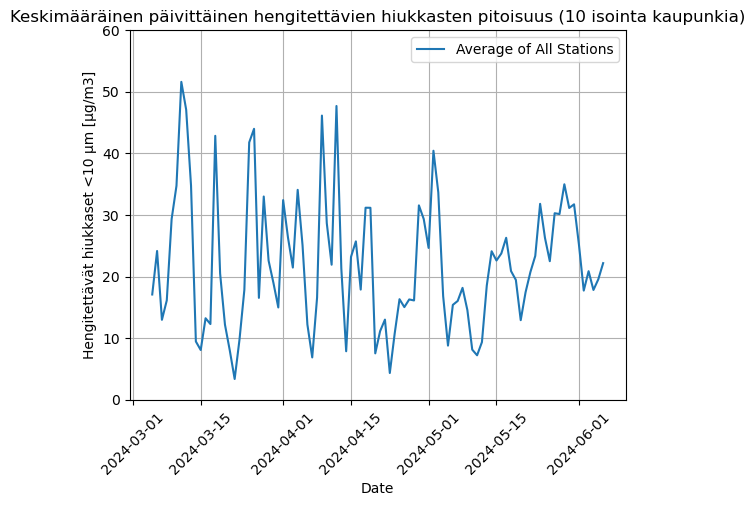

In [6]:

daily_avgs_all_stations = []


for df in stations:
    df['Hengitettävät hiukkaset <10 µm [µg/m3]'] = pd.to_numeric(df['Hengitettävät hiukkaset <10 µm [µg/m3]'], errors='coerce')
    
    daily_avg = df.groupby(df['Date'].dt.date)['Hengitettävät hiukkaset <10 µm [µg/m3]'].mean()
    
    daily_avgs_all_stations.append(daily_avg)


daily_avgs_all_stations_df = pd.concat(daily_avgs_all_stations, axis=1)


daily_avg_all_stations = daily_avgs_all_stations_df.mean(axis=1)
plt.plot(daily_avg_all_stations.index, daily_avg_all_stations.values, label='Average of All Stations')

plt.xlabel('Date')
plt.ylabel('Hengitettävät hiukkaset <10 µm [µg/m3]')
plt.title('Keskimääräinen päivittäinen hengitettävien hiukkasten pitoisuus (10 isointa kaupunkia)')
plt.xticks(rotation=45)
plt.legend()
plt.ylim(0,60)
plt.grid()
plt.show()

In [7]:
averages = []
i = 0
for df in stations:
    df['Hengitettävät hiukkaset <10 µm [µg/m3]'] = pd.to_numeric(df['Hengitettävät hiukkaset <10 µm [µg/m3]'], errors='coerce')
    averages.append({df["Havaintoasema"][0] : df["Hengitettävät hiukkaset <10 µm [µg/m3]"].mean()})

# sorted_averages = sorted(averages, key=lambda x: list(x.values())[0], reverse=True)

for item in averages:
    print(item)

{'Espoo Lintuvaara 2': 13.551751662971176}
{'Helsinki Teollisuuskatu': 31.66114564831261}
{'Jyväskylä Hannikaisenkatu': 18.480781180648023}
{'Kuopio Savilahti KYS': 24.878118064802486}
{'Lahti Saimaankatu': 18.983843763870397}
{'Oulu keskusta 2': 18.1537807606264}
{'Pori Paanakedonkatu': 25.67051509769094}
{'Tampere Pirkankatu': 18.189356984478934}
{'Turku Kauppatori 2': 18.016474245115454}
{'Vantaa Hämeenlinnanväylä': 32.95447661469933}
